In [2]:
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline
import pandas as pd

import sympy as sy

def plotSpectrum(y,Fs, color):
     """
     Plots a Single-Sided Amplitude Spectrum of y(t)
     """
     n = int(len(y)) # length of the signal
     k = np.arange(n)
     T = n/Fs
     frq = k/T # two sides frequency range
     frq = 50*frq[range(int(n/2))] # one side frequency range
     frq[0]=0
     Y = np.fft.fft(y)/n # fft computing and normalization
     Y = Y[range(int(n/2))]

#      print(frq,abs(Y))
     pl.plot(frq[:5000],2*abs(Y[:5000]),color) # plotting the spectrum
     pl.xlabel('f (Hz)')
     pl.ylabel('|Mag(f)|')

# 3 phase PWM

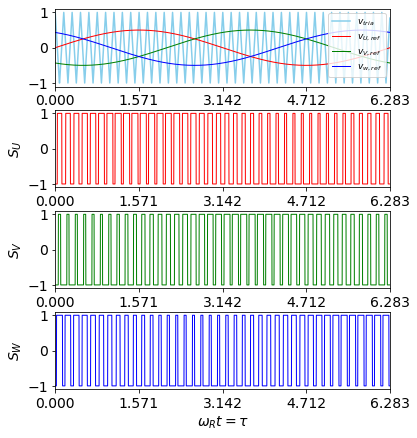

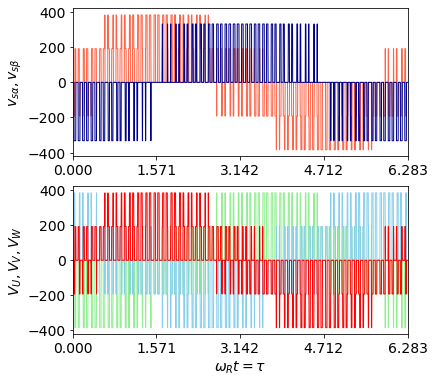

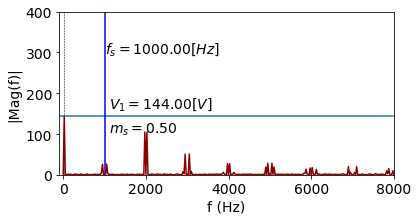

In [13]:
f1 = 50.0
fs = 0.5e3
pulsenumber = int(fs/f1)
ts = np.arange(0,2*np.pi,0.1)


#Generating 3 phase waveforms
def bitri(a,period,fs):
    tp = int(period)
    a = a
    fs = fs
    tria = 1
    tw = [1]
    ii = 0
    angle = [0]
    for i in range(1,int(2*fs)):
        angle.append(i*2*np.pi/(2*fs))
        if ii<= int(period) :
            tria -= 2*(1/period)
            if tria <= -1.0:
                tria = -1.0
        elif ii > int(period):
            tria += 2*(1/period)
            if tria >= 1.0:
                tria = 1.0
        if ii == 2*period:
            ii = 0
        tw.append(tria)
        ii = ii + 1
    return angle, tw
def bipwm(cw, rf, ang):
    pwm = []
    for ii in range(len(cw)):
        if rf[ii]>cw[ii]:
            pwm.append(1.0)
        else: 
            pwm.append(-1.0)
    return pwm
fs = 1e3

def bsqwave(a,period,tnow):
    T = period
    tr = tnow%T
    if (tr<=T/2):
        B = a
    else:
        B = -a
    return B

angn,twy = bitri(1.0,25.0,fs)
mi = 0.5

pulsenumber = int(fs/f1)

u1 = mi*np.sin(angn)
v1 = mi*np.sin(angn - 2.0*np.pi*np.ones(len(angn))/3.0)
w1 = mi*np.sin(angn - 4.0*np.pi*np.ones(len(angn))/3.0 )
a = 1.0
us = np.zeros(len(angn))
vs = np.zeros(len(angn))
ws = np.zeros(len(angn))

for ii in range(len(angn)):
    us[ii] = bsqwave(a, 2*np.pi, angn[ii])
    vs[ii] = bsqwave(a,2*np.pi, angn[ii] - 2.0*np.pi/3.0 )
    ws[ii] = bsqwave(a,2*np.pi, angn[ii] - 4.0*np.pi/3.0 )

pu = bipwm(twy, u1, angn)
pv = bipwm(twy, v1, angn)
pw = bipwm(twy,w1, angn)

pus = bipwm(twy,us,angn)
pvs = bipwm(twy,vs,angn)
pws = bipwm(twy,ws,angn)
Vdc = 576.0

#Producting 3 phase voltages
phasea = np.zeros(len(angn))
phaseb = np.zeros(len(angn))
phaseV = np.zeros(len(angn))
phaseW = np.zeros(len(angn))
phaseaS = np.zeros(len(angn))
phasebS = np.zeros(len(angn))
for ii in range(len(angn)):
    phasea[ii] = Vdc*(2.0/6.0)*(pu[ii] -0.5*pv[ii] -0.5*pw[ii])
    phaseb[ii] = Vdc*(2.0/6.0)*(0.866*pv[ii] -0.866*pw[ii])
    phaseV[ii] = -0.5*phasea[ii] + 0.866*phaseb[ii]
    phaseW[ii] = -0.5*phasea[ii] - 0.866*phaseb[ii]
    phaseaS[ii] = Vdc*(2.0/6.0)*(pus[ii] -0.5*pvs[ii] -0.5*pws[ii])
    phasebS[ii] = Vdc*(2.0/6.0)*(0.866*pvs[ii] -0.866*pws[ii])

    
####################################
dirfig =  "D:/tex/lec/pe/figures/"
dirfigdrives =  "D:/tex/lec/drives/figures/"

pl.figure(103, figsize = (6,7))
pl.rc('font', size =14)
pl.subplot(4,1,1)
pl.plot(angn, twy, 'skyblue', label = "$v_{tria}$")
pl.plot(angn,u1, 'red', lw =1 , label = "$v_{U,ref}$")
pl.plot(angn, v1, 'green', lw =1, label = "$v_{V,ref}$") 
pl.plot(angn, w1, 'blue', lw =1, label = "$v_{w,ref}$")
pl.xlim(0,2*np.pi)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.legend(loc = 'upper right', fontsize = 9)
pl.subplots_adjust(hspace = 0.3)
pl.subplot(4,1,2)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.plot(angn,pu, 'red', lw =1)
pl.ylabel(r'$S_U$')
pl.xlim(0,2*np.pi)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.subplot(4,1,3)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.plot(angn,pv,'green', lw =1)
pl.ylabel(r'$S_V$')
pl.xlim(0,2*np.pi)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.subplot(4,1,4)
pl.plot(angn,pw, 'blue', lw =1)
pl.ylabel(r'$S_W$')
pl.xlim(0,2*np.pi)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.xlabel(r'$\omega_R t = \tau$')

# pl.savefig(dirfigdrives+'ThreePhasePWM.pdf', bbox_inches = 'tight', transparent = True)
pl.figure(202, figsize = (6,6))
pl.subplot(2,1,1)
pl.plot(angn,phasea,'tomato', lw =1)
pl.plot(angn,phaseb,'darkblue', lw =1)
pl.ylabel(r'$v_{s\alpha}, v_{s\beta}$')
pl.xlim(0,2*np.pi)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.subplot(2,1,2)
pl.plot(angn,phaseV,'lightgreen', lw =1)
pl.plot(angn,phaseW,'skyblue', lw =1)
pl.plot(angn,phasea,'red', lw =1)
pl.ylabel(r'$V_{U}, V_{V}, V_{W}$')
pl.xlim(0,2*np.pi)
pl.xticks(np.linspace(0,2*np.pi,5))
pl.xlabel(r'$\omega_R t = \tau$')
# pl.savefig(dirfig+'ThreeVoltageSWPWM.pdf', bbox_inches = 'tight', transparent = True)

pl.figure(344,figsize = (6,3))
v1 = mi*Vdc/2.0
pl.axhline(mi*Vdc/2.0)
pl.axvline(50.0*pulsenumber, c = 'b')
pl.axvline(50.0*mi,ls = '--', c = 'k',lw =0.5)
plotSpectrum(phasea,2.0*25.0*pulsenumber,"darkred")
pl.xlim(-100,8*fs)
pl.ylim(0,400)
pl.text(1.1e3,v1+20, '$V_1 = {0:3.2f}[V]$'.format(v1))
pl.text(1.1e3,v1-40, '$m_s = {0:3.2f}$'.format(mi))
pl.text(fs, 300, '$f_s = {0:3.2f}[Hz]$'.format(fs))
# pl.savefig(dirfig+'SWPWMSpectra.pdf', bbox_inches = 'tight', transparent = True)
# print(v1/(2*Vdc/np.pi))

# #sqwave
# pl.figure(356,figsize = (6,3))
# pl.plot(angn, phaseaS, c = 'tomato', lw =3)
# pl.plot(angn, phasebS, c = 'darkblue', lw =3)
# pl.ylabel(r'$v_{s\alpha}, v_{s\beta}$')
# pl.axhline(0, c = 'k')
# pl.xlim(0,2*np.pi)
# pl.xticks(np.linspace(0,2*np.pi,5))
# pl.xlabel('$\omega t$')
# pl.savefig(dirfig+'SixStepvoltage.pdf', bbox_inches = 'tight', transparent = True)
# pl.figure(355,figsize = (6,3))
# v1s = 2*Vdc/np.pi
# pl.axhline(v1s, c = 'r')
# pl.axvline(50.0, c = 'b')
# pl.axvline(5*f1, c = 'b')
# pl.axvline(7*f1, c = 'b')
# plotSpectrum(phaseaS,2*50.0*pulsenumber)
# pl.xlim(-1.0,21*f1)
# pl.xticks([0,50.0,250.,350.0,550,650,850,950])
# # pl.ylim(0,400)
# pl.text(60,v1s+2, '$V_1 = {0:3.2f}[V]$'.format(v1s))
# pl.text(5*f1,v1s/5.0+2, '$v_5 = {0:3.2f}$'.format(v1s/5.0))
# # pl.text(fs, 150, '$f_s = {0:3.2f}[Hz]$'.format(fs))
# pl.savefig(dirfig+'SixStepSpectra.pdf', bbox_inches = 'tight', transparent = True)
# # print(v1/(2*Vdc/np.pi))


# #Only Phase voltage six step
# pl.figure(359,figsize = (6,3))
# pl.plot(angn, phaseaS, c = 'crimson', lw =3)
# #pl.plot(angn, phasebS, c = 'darkblue', lw =3)
# pl.ylabel(r'$v_{s\alpha}$')
# pl.axhline(0, c = 'k')
# pl.xlim(0,2*np.pi)
# pl.xticks(np.linspace(0,2*np.pi,5))
# pl.xlabel('$\omega t$')
# vpeak = (2.0/3.0)*Vdc
# pl.text(3.12,320,'Vmax ={0:3.2f}'.format(vpeak))
# pl.axhline(vpeak)
# pl.axhline(vpeak/2)
# pl.savefig(dirfig+'SixStepPhaseVoltage.pdf', bbox_inches = 'tight', transparent = True)


pl.show()


In [ ]:
#Sampling of triangaluarwave to produce regular sampling 
dang = angn[1] - angn[0]
def pulseduty(tri,ang,vs):
    angsample = np.zeros(len(ang))
    vsample = np.zeros(len(ang))
    dutysample = np.zeros(len(ang))

    for ii in range(len(ang)):
        if(tri[ii] == -1.0):
            angsample[ii] = vs[ii]
            vsample[ii] = vs[ii]
            dutysample[ii] = 0.5*(1 + vs[ii])
        else:
            angsample[ii] = angsample[ii-1]
            vsample[ii] = 0

    return [angsample, vsample, dutysample] 
    
asample = pulseduty(twy,angn,u1)    
pl.figure(213,figsize = (6,6))
pl.rc('font', size =14)
pl.subplot(3,1,1)
pl.subplots_adjust(hspace=0.29)
pl.plot(angn,u1,'coral',lw =2)
pl.plot(angn,twy, 'skyblue', lw=1)
pl.plot(angn,asample[1],'red',lw=2)
pl.xticks(np.linspace(angn[0],angn[-1]+dang,3))
pl.xlim(angn[0],angn[-1]+dang)
pl.subplot(3,1,2)
pl.plot(angn,asample[0],'crimson')
pl.xticks(np.linspace(angn[0],angn[-1]+dang,3))
pl.xlim(angn[0],angn[-1]+dang)
pl.yticks(np.linspace(-1.0,1.0,3))
pl.subplot(3,1,3)
pl.plot(angn,asample[2],'crimson')
pl.plot(angn,pu,'green', lw=1)
pl.xticks(np.linspace(angn[0],angn[-1]+dang,3))
pl.xlim(angn[0],angn[-1]+dang)
pl.xlabel('$\omega t$ [rad]')
pl.savefig(dirfig + "UniformSamplingPWM.pdf", bbox_inches = 'tight', transparent = True)
pl.show()
